# Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd
import numpy as np # importing libraries

In [2]:
housing = pd.read_csv('data1.csv') # reading csv

In [3]:
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() # checking if there is any missing data / null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         500 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts() # understanding value disctribution

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285734,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705495,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


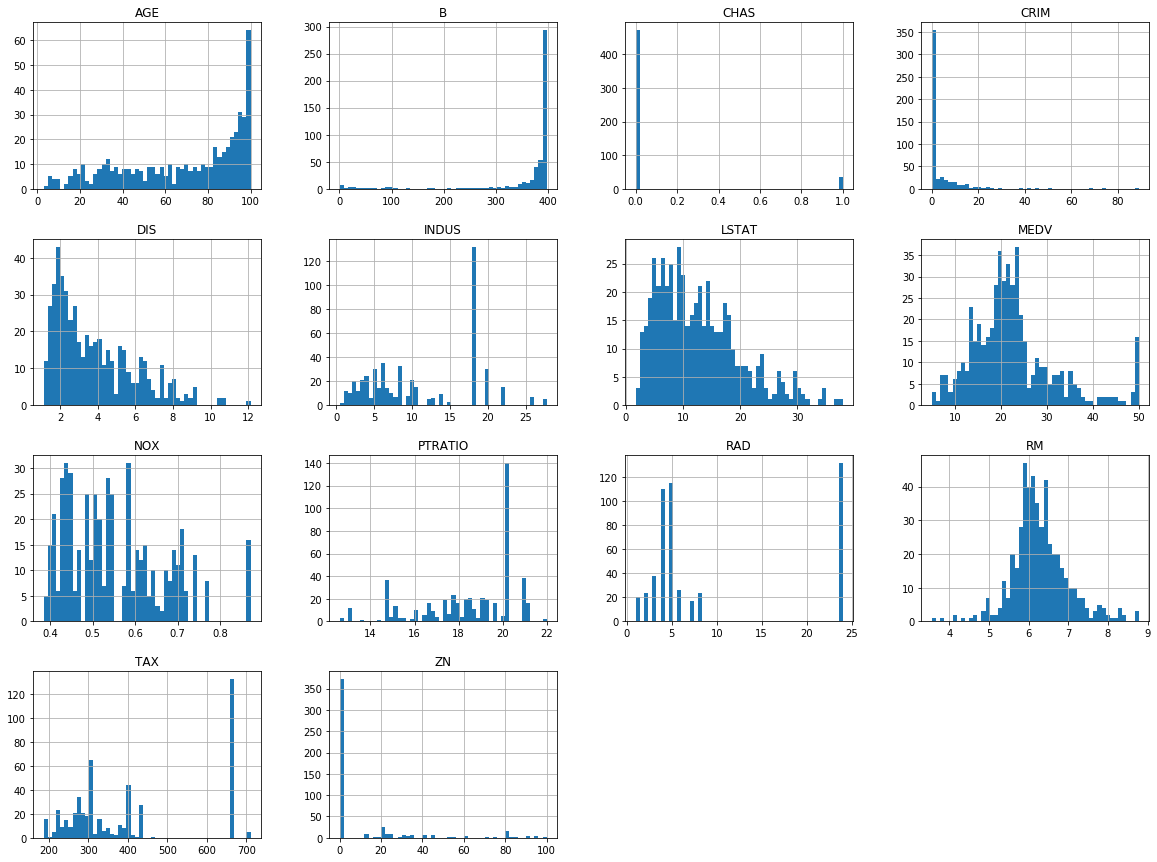

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize  = (20,15))
plt.show()

In [8]:
len(housing)

506

# Train - Test Splitting

In [9]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42) # to fix the index values for test and train set
#     shuffled = np.random.permutation(len(data)) #this will shuffle the indices in data
#     test_set_size = int(len(data) * test_ratio) # test size = Will take 0.2 as test_ratio so that 20 % of 506 is test data
#     test_indices = shuffled[:test_set_size]  # will give test set row index numbers
#     train_indices = shuffled[test_set_size:] # will give train set row index numbers
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set,test_set = split_train_test (housing,0.2)
# print("rows in train set", len(train_set))
# print ("rows in test set", len(test_set))

In [11]:
# Mostly we use sklearn's train test algorithm for splitting

from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [12]:
print("rows in train set", len(train_set))
print ("rows in test set", len(test_set))

rows in train set 404
rows in test set 102


# Stratified Sampling - On the basis of CHAS feature , ensuring 0 and  1 values are equally distributed IN Train and Test set

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(housing,housing["CHAS"]): # splitting housing data basis CHAS feature
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [14]:
train_index

array([254, 348, 476, 321, 326, 411, 250, 100, 429,  57, 413, 115, 490,
       199, 494, 142, 113, 468, 400, 247, 151, 408,  68, 365,  81,  93,
       456, 116,  27, 234, 140,  47, 382, 377, 366, 185,  73, 267, 231,
       118,  96,  40, 182, 417, 492, 373, 294, 482,  62, 414, 289,  72,
       314,  89, 129, 157, 110, 343, 200, 310, 462, 361,  95,  37, 145,
       227, 166,  23,  85, 281, 285, 264, 501, 440, 241, 473,   0, 488,
       452, 323, 252, 416, 119,  60, 251, 409, 191,  42, 188, 412,  92,
       353, 292, 107,  12,   3, 364, 339, 301, 467, 376, 280, 309, 202,
        61,  24, 122, 164, 278, 139,  10, 415, 390, 338, 445, 486, 156,
       179, 159,  22, 318, 404, 425,  45,  74, 147, 431, 215, 434,  44,
        83, 144, 500, 406, 161, 331, 243, 293,  86, 162, 458, 359, 295,
       124, 341, 244, 319, 337,  15, 384, 248, 441, 258,  31, 481, 450,
       316,  66,  56, 211, 184, 325,  41,  11, 262, 491, 177, 369, 249,
       238, 125,   5, 224, 235, 334, 165, 475,  63, 437, 497, 22

In [15]:
test_index

array([342, 379, 223, 219,  48, 134,  49, 448, 197, 273, 495, 374, 360,
       407, 336, 383, 284,  34, 320, 221, 130, 106, 380, 176, 102, 290,
       451, 275, 385, 198, 286, 487, 173, 378, 168, 394, 261,  43, 333,
       256, 213, 263, 357,  53, 105, 303, 232, 340, 465, 355, 498,  20,
       297, 356, 296, 237, 225, 194,  54,  13, 195, 401, 346, 181, 478,
        99, 167, 470, 150, 291, 160,  91, 230, 330, 196, 489, 153, 255,
       335, 322,  87, 505, 424,   1,  50, 480, 420,  71, 502,  58,  21,
        80, 398, 272, 422, 300, 493,  88, 466,  52, 121, 218])

In [16]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [17]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [18]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [19]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [20]:
376/28

13.428571428571429

In [21]:
95/7

13.571428571428571

Checking whether CHAS feature values are equally distributed in strat_test_set and strat_train_set. ratio is 13 almost same in 
both

In [22]:
housing = strat_train_set.copy() # always do this before looking for correlations

# Looking for Correlations

 - Correlation values varies from 1- to 1 . 1 means very strong positive correlation and -1 very strong negative correlation
 - use 'pearson'

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix['MEDV'].sort_values(ascending = False) 

MEDV       1.000000
RM         0.680344
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe66838b630>,
      dtype=object)

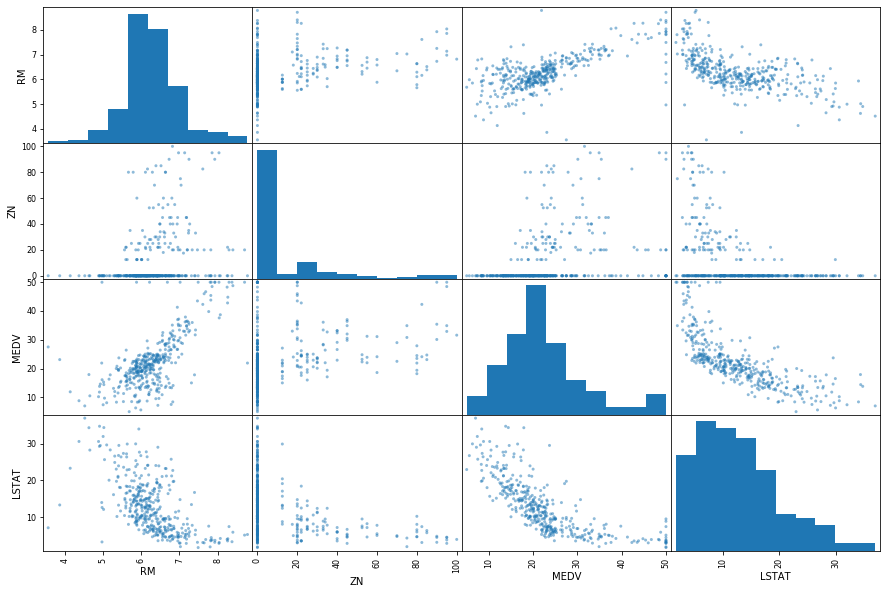

In [25]:
from pandas.plotting import scatter_matrix
attributes = ['RM','ZN','MEDV','LSTAT'] # chosen columns based on strong postive/negative correlation 
scatter_matrix(housing[attributes],figsize = (15,10))


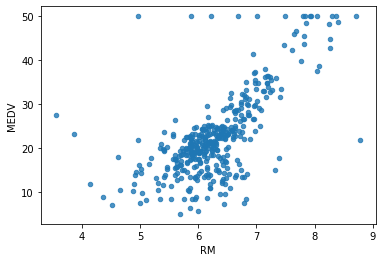

In [26]:
housing.plot(kind = 'scatter', x = 'RM', y = 'MEDV', alpha = 0.8) # alpha shows dark area where density is high

## Trying out Attribute Combination

In [27]:
housing.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5


In [28]:
housing['TAXRM'] = housing.TAX/housing.RM

In [29]:
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [30]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680344
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.531284
LSTAT     -0.740494
Name: MEDV, dtype: float64

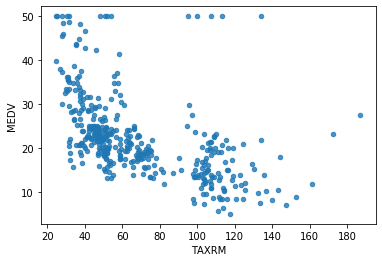

In [31]:
housing.plot(kind = 'scatter', x = 'TAXRM', y = 'MEDV', alpha = 0.8) # alpha shows dark area where density is high

In [32]:
# splitting features and values
housing = strat_train_set.drop("MEDV",axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes 

- Get rid of missing data points - a = housing.dropna(subset = ['RM']),then, a.shape().. original housing df will be unchanged


- Get rid of whole attribute - housing.drop('RM',axis = 1)-> RM column will be dropped.original housing df will be unchanged


- Set the missing values to some value (0 or mean or median)

In [33]:
# Lets explore 3rd option and fill Na's with median

median = housing['RM'].median()
median

6.21

In [34]:
housing['RM'].fillna(median) # here also original housing df is unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

#### Same steps can be performed as mentioed below - 

In [35]:
housing.shape

(404, 13)

In [36]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,398.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281219,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716710,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630750,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [38]:
imputer.statistics_ # gives median for all columns

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [39]:
X = imputer.transform(housing) # transforming the housing dataframe through adding missing attributes with median value

In [40]:
housing_tr = pd.DataFrame(data = X, columns = housing.columns) # created a new df with transformed data but columns name same as housing

In [41]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280161,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711407,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

Primarily, three types of objects

Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

# Feature Scaling



Primarily, two types of feature scaling methods:

Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this. Values will be between 0 and 1

Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this. Data is spread with variance/stdev 1.

# Creating a Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),('std_scalar', StandardScaler())]) #... add as many as we can based on the project

In [44]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr  # for further steps we want data in the array form therefore, performed this step (predictors). wont be\
# creating a new df as its not required

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [45]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for Dragon Real Estates

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
# model = LinearRegression()
model.fit(housing_num_tr,housing_labels)# model is fit now

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
# creating mini dataset for testing the model

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [48]:
prepared_data = my_pipeline.transform(some_data) # transforming data thrpugh our pipline

In [49]:
model.predict(prepared_data) # predicting values

array([22.454, 24.985, 16.36 , 23.281, 23.547])

In [50]:
# now printing some_labels to observe whether predicted values are close to actual values or not

 list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [52]:
mse

1.3868990618811843

In [53]:
rmse

1.1776667872879767

 - With Linear Regression , mse was high was high so we tested decision tree
 - with decision tree, mse was 0, overfitting happened
 

## Using better evaluation technique - Cross Validation

In [54]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.74418312, 2.72680942, 4.51240668, 2.67730702, 3.2813138 ,
       2.7450212 , 4.61002559, 3.35070762, 3.47952982, 3.18500883])

In [55]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [56]:
print_scores(rmse_scores)

Scores: [2.74418312 2.72680942 4.51240668 2.67730702 3.2813138  2.7450212
 4.61002559 3.35070762 3.47952982 3.18500883]
Mean:  3.331231310868811
Standard deviation:  0.6751255639396453


 - Decision tree -     Mean:  4.360538319266928 and Standard deviation:  1.1200640031189373
 - Linear Refression - Mean:  5.03273437882428 and Standard deviation:  1.0563602090039257
 - Random Forest -     Mean:  3.331231310868811 and Standard deviation:  0.6751255639396453
 
 -- So, Random Forest is the best

# Saving the model

In [57]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

# Testing the model on Test Data

In [60]:
X_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [61]:
final_rmse

2.9027350067837463

In [62]:
print(final_predictions,list(y_test)) # analysing actual and predicted values

[24.538 11.315 25.48  21.868 18.45  15.058 20.205 14.507 32.32  41.28
 20.014 11.693 24.104 28.163 19.496 11.155 32.091 14.219 23.441 18.925
 19.726 17.629 16.677 22.113 19.177 31.624 15.791 33.277  9.494 33.811
 23.43  21.357 22.877 10.843 21.199 10.98  43.492 24.847 23.662 43.259
 24.272 29.203 20.452 20.671 19.35  33.732 44.343 20.118 20.291 21.343
 21.196 14.466 21.518 14.677 25.136 33.304 41.452 28.535 19.359 20.427
 46.561  9.766 19.724 25.46  14.396 32.69  20.245 18.364 18.958 34.119
 26.71  22.857 21.133 22.202 34.195 13.623 15.717 19.914 20.865 21.409
 22.592 21.16  13.902 22.962 20.607 21.291 14.379 21.56  21.962 23.222
 18.908 27.231  7.478 26.309 19.346 29.72  19.378 30.374 14.673 26.778
 21.346 20.241] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

# Using the model

In [63]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([25.249])